In [1]:
import sys
sys.path.extend(['/Users/zsolt/Colloid_git/TractionRheoscopy'])
from data_analysis import static as da
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from importlib import reload
import gc

In [92]:
reload(da)

<module 'data_analysis.static' from '/Users/zsolt/Colloid_git/TractionRheoscopy/data_analysis/static.py'>

In [5]:
hdf_stem = '/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/locations_stitch/'
sed_fName = 'tfrGel10212018A_shearRun10292018f_sed_stitched.h5'
gel_fName = 'tfrGel10212018A_shearRun10292018f_gel_stitched.h5'

In [6]:
gelPos = da.loadData2Mem(hdf_stem + gel_fName)
sedPos = da.loadData2Mem(hdf_stem + sed_fName)

In [9]:
gelFitPlane_dict = da.fitTopSurface(gelPos)
da.distFromPlane(gelPos,'z (um, below gel)',gelFitPlane_dict)
gelStrain_traj = da.gelStrain(gelPos,160)

/Users/zsolt/Colloid_git/TractionRheoscopy/data_analysis/static.py:124: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  fit, residual, rank, s = np.linalg.lstsq(A, z)


In [5]:
gelStrain_traj.dropna().head()

Ref Pos      (0,0)      (0,1)      (0,2)  \
particle value                                                            
3        x (um, imageStack)  29.681689   0.000000  -0.032821   0.099502   
         y (um, imageStack)  13.350886   0.000000  -0.017842   0.039460   
         z (um, imageStack)   5.578862   0.000000  -0.098031  -0.162779   
         e_xz                 0.000000   0.000000  -0.000198   0.000601   
         z (um, below gel)  -18.500928 -18.500928 -18.772998 -18.628887   

                                 (0,3)      (0,4)      (0,5)      (0,6)  \
particle value                                                            
3        x (um, imageStack)   0.305819   0.428342   0.519632   0.645046   
         y (um, imageStack)  -0.050293  -0.104591  -0.157356  -0.087643   
         z (um, imageStack)  -0.186965  -0.236977  -0.297549  -0.243068   
         e_xz                 0.001847   0.002587   0.003138   0.003896   
         z (um, below gel)  -18.867155 -18.565677 -18.724014 -18.635266   

                                 (0,7)      (0,8)  ...     (0,80)     (0,81)  \
particle value                                     ...                         
3        x (um, imageStack)   0.815967   0.923361  ...   0.061869   0.042623   
         y (um, imageStack)  -0.065672  -0.085187  ...  -0.335904  -0.408020   
         z (um, imageStack)  -0.309091  -0.307070  ...  -0.687327  -0.784401   
         e_xz                 0.004928   0.005577  ...   0.000374   0.000257   
         z (um, below gel)  -18.877036 -18.757674  ... -18.978800 -19.181719   

                                (0,82)     (0,83)     (0,84)     (0,85)  \
particle value                                                            
3        x (um, imageStack)   0.067159   0.077378   0.058749   0.002037   
         y (um, imageStack)  -0.295421  -0.329066  -0.390096  -0.343746   
         z (um, imageStack)  -0.730022  -0.688332  -0.680038  -0.684385   
         e_xz                 0.000406   0.000467   0.000355   0.000012   
         z (um, below gel)  -18.914738 -18.489705 -18.899215 -19.189473   

                                (0,86)     (0,87)     (0,88)     (0,89)  
particle value                                                           
3        x (um, imageStack)  -0.000877   0.038136   0.035299   0.090004  
         y (um, imageStack)  -0.394287  -0.378365  -0.325123  -0.325262  
         z (um, imageStack)  -0.573758  -0.618163  -0.582183  -0.708028  
         e_xz                -0.000005   0.000230   0.000213   0.000544  
         z (um, below gel)  -18.981697 -18.840967 -18.942365 -18.941828  

[5 rows x 91 columns]

In [7]:
posKey = ['x (um, imageStack)', 'y (um, imageStack)', 'z (um, imageStack)']
sed_disp = sedPos[posKey] - sedPos[posKey].xs(0,level='frame')
sed_disp['zbin'] = pd.cut(sedPos['z (um, imageStack)'], 60)
sed_disp.dropna()

x (um, imageStack)  y (um, imageStack)  z (um, imageStack)  \
frame particle                                                               
0     0                   0.000000            0.000000            0.000000   
      1                   0.000000            0.000000            0.000000   
      2                   0.000000            0.000000            0.000000   
      3                   0.000000            0.000000            0.000000   
      4                   0.000000            0.000000            0.000000   
...                            ...                 ...                 ...   
89    966608              0.189908            0.092274           -0.252435   
      966609              0.391685            0.085338           -0.442820   
      966611              0.202657           -0.139466           -0.350135   
      966612              0.233349           -0.146008           -0.292767   
      966614              0.282811           -0.006932           -0.254472   

                            zbin  
frame particle                    
0     0         (27.061, 28.099]  
      1         (27.061, 28.099]  
      2         (27.061, 28.099]  
      3         (27.061, 28.099]  
      4         (27.061, 28.099]  
...                          ...  
89    966608    (85.239, 86.278]  
      966609      (84.2, 85.239]  
      966611    (68.616, 69.655]  
      966612    (69.655, 70.694]  
      966614    (76.927, 77.966]  

[83135813 rows x 4 columns]

In [16]:
# compute the avg displacement of x for each time frame
tmp = sed_disp[sed_disp['zbin'] == pd.Interval(left=84.2, right=85.239)].dropna()['x (um, imageStack)'].unstack().mean(axis=1)

frame
0     0.000000
1     0.022392
2     0.071757
3     0.115836
4     0.154409
        ...   
85    0.061273
86    0.060135
87    0.064786
88    0.062135
89    0.064443
Length: 90, dtype: float64

In [24]:
gelPos[posKey] - gelPos[posKey].xs(0,level='frame')
pd.cut(gelPos['z (um, imageStack)'],60)

frame  particle
0      0             (4.268, 4.706]
       1             (5.144, 5.581]
       2             (5.581, 6.019]
       3             (5.144, 5.581]
       4             (6.019, 6.457]
                         ...       
89     19558       (26.595, 27.033]
       19559       (26.157, 26.595]
       19560        (25.72, 26.157]
       19561       (26.157, 26.595]
       19562        (15.65, 16.088]
Name: z (um, imageStack), Length: 280461, dtype: category
Categories (60, interval[float64]): [(2.491, 2.955] < (2.955, 3.392] < (3.392, 3.83] < (3.83, 4.268] ... (27.033, 27.471] < (27.471, 27.908] < (27.908, 28.346] < (28.346, 28.784]]

In [20]:
gelPos - gelPos.xs(0,level='frame')

x (um, imageStack)  y (um, imageStack)  z (um, imageStack)  \
frame particle                                                               
0     0                        0.0                 0.0                 0.0   
      1                        0.0                 0.0                 0.0   
      2                        0.0                 0.0                 0.0   
      3                        0.0                 0.0                 0.0   
      4                        0.0                 0.0                 0.0   
...                            ...                 ...                 ...   
89    19558                    NaN                 NaN                 NaN   
      19559                    NaN                 NaN                 NaN   
      19560                    NaN                 NaN                 NaN   
      19561                    NaN                 NaN                 NaN   
      19562                    NaN                 NaN                 NaN   

                x_std  y_std  z_std  z (um, below gel)  
frame particle                                          
0     0           0.0    0.0    0.0                0.0  
      1           0.0    0.0    0.0                0.0  
      2           0.0    0.0    0.0                0.0  
      3           0.0    0.0    0.0                0.0  
      4           0.0    0.0    0.0                0.0  
...               ...    ...    ...                ...  
89    19558       NaN    NaN    NaN                NaN  
      19559       NaN    NaN    NaN                NaN  
      19560       NaN    NaN    NaN                NaN  
      19561       NaN    NaN    NaN                NaN  
      19562       NaN    NaN    NaN                NaN  

[280461 rows x 7 columns]

In [14]:
7*((6.25*180)/(1.5*55 + 6.25*180))180

SyntaxError: invalid syntax (<ipython-input-14-59423b4211f9>, line 1)

In [9]:
7/180

0.03888888888888889

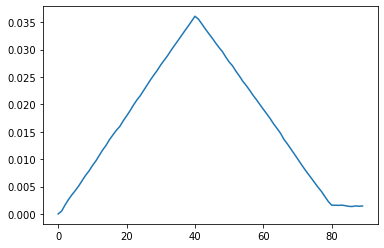

In [23]:
gridPos = da.linearElastic(sedPos)
sns.lineplot(x=range(90),y=gridPos)

In [93]:
reload(da)
for t in range(90):
    da.plotSpatialGelStress(gelStrain_traj,t,sedPos,type='linearElastic_fluct',outSuffix='Phantom')
    plt.close()

In [88]:
gelStrain_traj.xs('e_xz', level='values').drop(columns=['Ref Pos']).transpose().reset_index().drop(columns='index').subtract(linearStrain,axis=1).transpose()[0]

0       0.000000
1      -0.000504
2      -0.001615
3      -0.002607
4      -0.003475
          ...   
3165         NaN
3166         NaN
3167         NaN
3168         NaN
3169         NaN
Name: 0, Length: 3170, dtype: float64

In [91]:
gelStrain_traj.dropna().xs('e_xz',level='values')

,Ref Pos,"(0,0)","(0,1)","(0,2)","(0,3)","(0,4)","(0,5)","(0,6)","(0,7)","(0,8)",...,"(0,80)","(0,81)","(0,82)","(0,83)","(0,84)","(0,85)","(0,86)","(0,87)","(0,88)","(0,89)"
particle,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,-0.000198,0.000601,0.001847,0.002587,0.003138,0.003896,0.004928,0.005577,...,0.000374,0.000257,0.000406,0.000467,0.000355,0.000012,-0.000005,0.000230,0.000213,0.000544
4,0.0,0.0,0.000124,0.001031,0.002305,0.002915,0.003608,0.004831,0.005128,0.005907,...,0.000788,0.000643,0.000444,0.000439,0.000423,0.000018,0.000096,0.000223,0.000200,0.000599
5,0.0,0.0,-0.000091,0.001065,0.002030,0.002668,0.003212,0.004338,0.004945,0.005607,...,0.000733,0.000373,0.000624,0.000674,0.000599,-0.000030,0.000365,0.000220,0.000152,0.000555
6,0.0,0.0,-0.000130,0.000913,0.002183,0.002730,0.003436,0.004288,0.005239,0.005777,...,0.000551,0.000489,0.000099,0.000208,0.000427,-0.000215,-0.000262,-0.000011,0.000159,0.000075
7,0.0,0.0,0.000096,0.001174,0.002160,0.002965,0.003553,0.004324,0.005229,0.005791,...,0.000699,0.000700,0.000622,0.000625,0.000444,0.000057,0.000011,0.000405,0.000273,0.000584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3154,0.0,0.0,-0.000107,0.001307,0.002643,0.002934,0.003508,0.004352,0.005247,0.006028,...,0.000728,0.000312,0.000379,0.000737,0.000257,-0.000263,-0.000163,0.000170,0.000078,0.000026
3158,0.0,0.0,0.000151,0.001284,0.002424,0.002817,0.003390,0.004145,0.005303,0.005763,...,0.000571,0.000111,0.000114,0.000441,0.000104,-0.000048,-0.000272,-0.000125,0.000041,0.000033
3159,0.0,0.0,0.000032,0.001038,0.002203,0.002691,0.003050,0.003805,0.004851,0.005517,...,0.000568,0.000033,0.000016,0.000077,-0.000054,-0.000288,-0.000528,-0.000334,-0.000139,-0.000210


In [84]:
linearStrain = da.linearElastic(sedPos)
linearStrain

frame
0     0.000000
1     0.000504
2     0.001615
3     0.002607
4     0.003475
        ...   
85    0.001379
86    0.001353
87    0.001458
88    0.001398
89    0.001450
Length: 90, dtype: float64

In [50]:
gelStrain_traj.xs('e_xz',level='values').transpose().reset_index().drop(0).drop(columns='index').transpose().subtract(linearStrain.transpose(),axis=1)

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
particle,,,,,,,,,,,,,,,,,,,,,
0,NaN,-0.000504,-0.001557,-0.001575,-0.001109,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-0.000504,-0.001704,-0.001668,-0.001594,-0.001425,-0.001740,-0.001957,-0.002011,-0.001707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-0.000504,-0.001593,-0.001589,-0.001346,-0.001350,-0.001520,-0.001992,-0.002047,-0.002057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-0.000504,-0.001813,-0.002006,-0.001628,-0.001667,-0.001961,-0.002178,-0.002088,-0.002250,...,-0.001207,-0.001304,-0.001201,-0.001029,-0.001024,-0.001341,-0.001463,-0.001168,-0.001237,NaN
4,NaN,-0.000504,-0.001491,-0.001576,-0.001170,-0.001339,-0.001492,-0.001243,-0.001887,-0.001920,...,-0.000793,-0.000919,-0.001163,-0.001057,-0.000955,-0.001335,-0.001362,-0.001175,-0.001250,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,NaN,-0.000504,-0.001794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3166,NaN,-0.000504,-0.001434,-0.001367,-0.001063,-0.001173,-0.001705,-0.002072,-0.002216,-0.002405,...,-0.001128,-0.001524,-0.001402,-0.001135,-0.001476,-0.001845,-0.002169,-0.001560,-0.001658,NaN
3167,NaN,-0.000504,-0.001589,-0.001335,-0.000951,-0.001147,-0.001474,-0.001567,-0.001600,-0.001856,...,-0.001115,-0.001300,-0.001219,-0.000920,-0.001375,-0.001615,-0.001862,-0.001686,-0.001599,NaN


#Pair correlation flattening

# Pair correaltion flattening

In [94]:
import trackpy

In [96]:
pos = sedPos.xs(0,level='frame').dropna()

In [100]:
235/5

47.0

In [165]:
pos['xbin'] = pd.cut(pos['x (um, imageStack)'],25)
pos['ybin'] = pd.cut(pos['y (um, imageStack)'],25)

/Users/zsolt/.conda/envs/TractionRheoscopy/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/zsolt/.conda/envs/TractionRheoscopy/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [166]:
pos_grp = pos.rename(columns={'x (um, imageStack)':'x', 'y (um, imageStack)':'y', 'z (um, imageStack)':'z'})[['x','y','z','xbin','ybin']].groupby(['xbin','ybin'])

In [321]:
#
rdfPeak_df = pos_grp.apply(rdfPeak)
rdfPeak_df

xbin                ybin              
(0.956, 10.52]      (0.705, 10.28]        1.58
                    (10.28, 19.622]       1.58
                    (19.622, 28.965]      1.59
                    (28.965, 38.307]      1.60
                    (38.307, 47.649]      1.59
                                          ... 
(225.124, 234.454]  (187.782, 197.124]    1.58
                    (197.124, 206.466]    1.58
                    (206.466, 215.808]    1.57
                    (215.808, 225.15]     1.58
                    (225.15, 234.492]     1.59
Length: 625, dtype: float64

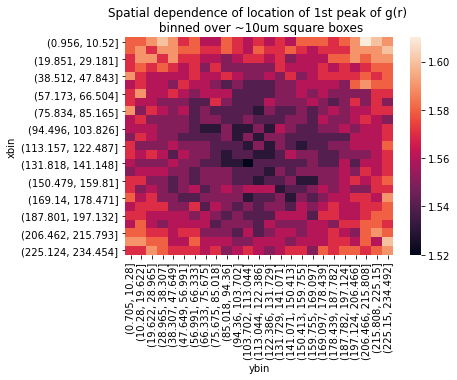

In [326]:
sns.heatmap(rdfPeak_df.unstack())
plt.title('Spatial dependence of location of 1st peak of g(r) \n binned over ~10um square boxes')
plt.savefig(figPath+'/{}/{}'.format('aberrationCorrection','localRDF_1stPeak_binned_heatMap.png'),dpi=300,bbox_inches='tight')
#plt.savefig(figPath+'/{}/{}'.format())

In [208]:
rdfPeak_df = pos_grp.apply(rdfPeak).reset_index()
rdfPeak_df['ybin'] = rdfPeak_df['ybin'].apply(lambda x: x.mid)
rdfPeak_df['xbin'] = rdfPeak_df['xbin'].apply(lambda x: x.mid)

In [216]:
xPts, yPts, rdf_height = [rdfPeak_df.to_numpy()[:,i] for i in range(3)]

In [247]:
from scipy import interpolate

In [279]:
splineFit = interpolate.SmoothBivariateSpline(xPts,yPts, rdf_height,w=np.ones(len(xPts)),bbox=[0,240,0,240])

In [309]:
figPath = '/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/plots'

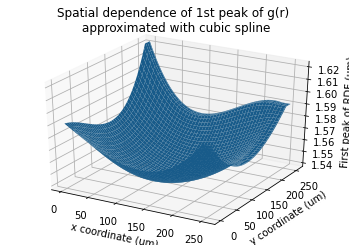

In [314]:
fig = plt.figure()
ax = plt.axes(projection='3d')
samplePts = np.linspace(1,255,2*255)
X,Y = np.meshgrid(samplePts,samplePts)
ax.plot_surface(X, Y, splineFit.ev(X,Y))
ax.set_zlabel('First peak of RDF (um)')
ax.set_xlabel('x coordinate (um)')
ax.set_ylabel('y coordinate (um)')
ax.set_title('Spatial dependence of 1st peak of g(r) \n approximated with cubic spline')
fig.savefig(figPath+'/{}/{}'.format('aberrationCorrection','localRDF_1stPeak_3DPlot.png'),dpi=300)

#splineFit.ev(np.linspace(1,255,2*255),np.linspace(1,255,2*255))

In [304]:
splineFit.integral(125,126,125,234)/(234-125)

1.549838892401103

In [170]:
def rdfPeak(pos_df):
    bins, values = trackpy.static.pair_correlation_3d(pos_df,4,dr=0.01)
    return bins[np.argmax(values)]

In [155]:
rdfPeak(pos_tmp)

1.55

In [217]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [285]:
np.linspace(1.5,2,4)
6-(-1.5-1.667)

9.167

# Spatial selection of local strain in sediment

In [7]:
sed_strainTraj_dt3 = pd.read_hdf(hdf_stem + '/{}'.format('tfrGel10212018A_shearRun10292018f_sed_strainTraj_dt3.h5'))

In [10]:
da.distFromPlane(sedPos,'height above gel (um)', gelFitPlane_dict)

In [505]:
pos_t0 = sedPos.xs(0,level='frame').dropna()
pos_t0

,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)",x_std,y_std,z_std,height above gel (um)
particle,,,,,,,
0,23.480112,2.221875,27.385583,0.160625,0.149919,0.139626,3.460038
1,31.531264,2.180390,27.351286,0.121123,0.120859,0.108598,3.462884
2,37.789111,2.119240,27.275850,0.130098,0.134635,0.117372,3.416792
3,39.408522,2.436315,27.277841,0.110703,0.114330,0.101162,3.420923
4,35.347537,2.748365,27.335966,0.134831,0.134550,0.121837,3.455543
...,...,...,...,...,...,...,...
966612,191.904731,192.215129,70.654755,0.109355,0.106793,0.111210,44.379256
966613,200.239323,221.314075,72.174485,0.130724,0.127162,0.099879,45.459992
966614,200.872221,195.003562,77.325691,0.097037,0.093481,0.099537,51.045122


In [511]:
#tmp2 = sed_strainTraj_dt3.dropna().head(22)

In [631]:
#tmp2[tmp2.loc[(slice(None),'nnb count'),:] >=9].dropna()

In [632]:
# get index for all particles within 15um of gel by slsecting on position df at reference time 
idx = pos_t0[(pos_t0['height above gel (um)'] <15)].dropna().index
# now select for particles with more than 9 nnb on strain df...
tmp = sed_strainTraj_dt3[sed_strainTraj_dt3.loc[(slice(None),'nnb count'),:] >= 9].dropna().unstack()
#tmp = tmp.unstack()
# index is the intersection to both complete nnb and close to gel
idx = idx.intersection(tmp.index)

In [633]:
#sed_strainTraj_dt3.loc[tmp.index[0:100]].loc[(slice(None),'eyz'),:]

In [626]:
# reindex instead of loc, apparently, is faster, although in this case the majority of the time is spent unstacking sed_strainTraj
#buf = sed_strainTraj_dt3.unstack().reindex(tmp.index[0:10000])

# just select eyz component now on multi index column and drop the unnecessary indices
#buf.loc[:,buf.columns.get_level_values(1) =='eyz'].droplevel(1,axis=1)

In [850]:
buf = sed_strainTraj_dt3.unstack().reindex(idx)
sedStrain_bottom = buf.loc[:,buf.columns.get_level_values(1) =='ezz'].droplevel(1,axis=1)

In [635]:
sedStrain_bottom.dropna()

,"(0,1)","(0,3)","(1,4)","(2,5)","(3,6)","(4,7)","(5,8)","(6,9)","(7,10)","(8,11)",...,"(77,80)","(78,81)","(79,82)","(80,83)","(81,84)","(82,85)","(83,86)","(84,87)","(85,88)","(86,89)"
particle,,,,,,,,,,,,,,,,,,,,,
56,0.004875,0.002997,-0.016974,-0.001535,-0.006586,0.003553,-0.003277,0.002144,0.013578,-0.001032,...,0.001079,0.011755,-0.007296,0.006048,0.000570,0.005689,-0.002618,-0.010723,0.011509,-0.001900
69,0.004752,0.002361,-0.012511,-0.002011,0.008677,0.021469,-0.017314,-0.009689,-0.010618,0.013154,...,-0.009613,0.009846,-0.011068,-0.011149,0.008006,0.003295,0.001219,0.001688,0.009674,0.013692
85,-0.000004,0.014986,0.015932,0.006634,-0.009585,-0.005614,-0.008478,0.003235,-0.005018,-0.007082,...,-0.006378,0.004439,-0.011403,-0.010097,0.010016,0.026353,0.010713,-0.007259,-0.014047,0.003336
99,-0.017100,-0.012669,0.008913,0.015173,0.004908,-0.015747,-0.009884,0.002759,0.005040,-0.003169,...,-0.006457,0.010363,-0.032860,0.006105,0.016888,0.006189,-0.012805,-0.022733,0.021456,0.001708
104,-0.009070,-0.018440,0.015314,0.002245,0.024648,-0.005309,-0.003762,0.000582,-0.005445,0.001473,...,0.005636,0.013004,-0.028871,-0.013764,-0.006489,0.004359,0.011990,-0.005535,0.006313,0.005321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289187,-0.005212,0.010724,0.010987,0.013582,-0.013872,-0.004559,-0.013187,0.003661,0.000487,0.011585,...,-0.006723,-0.001320,-0.003024,0.003391,0.005555,0.003219,-0.002383,-0.002310,-0.009227,-0.001997
289188,-0.011785,0.010917,0.017294,0.000662,-0.001934,0.000042,0.000136,-0.009819,-0.010777,-0.006054,...,-0.008071,0.008163,-0.008526,0.001729,-0.008654,0.005057,0.010334,-0.002370,0.005470,0.000446
289191,-0.005426,0.003109,0.010115,0.002515,-0.000703,-0.003274,-0.000909,0.006265,0.000411,0.008018,...,0.006199,-0.010022,-0.002404,-0.001898,0.000072,-0.017565,-0.007015,-0.002489,-0.000125,0.003349


In [636]:
# Too slow
#sedStrain_bottom = sed_strainTraj_dt3.loc[idx.intersection(tmp.index)].loc[(slice(None),'eyz'),:]

In [639]:
pos0 = sedPos.xs(0,level='frame').loc[idx]

In [457]:
# drop the useless index 'eyz' in order to allow for assignment of xbin and ybin
#sedStrain_bottom.index = sedStrain_bottom.index.droplevel(1)

In [851]:
# bin in x and y
sedStrain_bottom['xbin'] = pd.cut(pos0['x (um, imageStack)'], 40)
sedStrain_bottom['ybin'] = pd.cut(pos0['y (um, imageStack)'], 40)
sedStrain_bottom['zbin'] = pd.cut(pos0['height above gel (um)'], 3)

In [852]:
tmp = sedStrain_bottom.groupby(['xbin','ybin']).mean().apply(lambda x: x*100)
for t in sedStrain_bottom.columns[0:-3]:
    sns.heatmap(tmp[t].unstack(),cmap='PiYG',vmin=-0.8,vmax=0.8)
    t_fName = 't{}'.format(t.replace('(','').replace(')','').replace(',','_'))
    plt.title('Local pressure (ezz) \n averaged over ~5um square boxes')
    plt.savefig(figPath+'/{}/{}'.format('sedStrain/localStrain','localPressure_ezz_dt3_{}.png'.format(t_fName)),dpi=300,bbox_inches='tight')
    plt.close()

In [645]:
tmp_xyzBin = sedStrain_bottom.groupby(['xbin','ybin','zbin']).mean().apply(lambda x: x*100)

In [651]:
tmp_xyzBin['(0,1)']

xbin               ybin                zbin           
(1.681, 7.537]     (1.806, 7.824]      (2.771, 6.856]    -0.010264
                                       (6.856, 10.928]    0.151607
                                       (10.928, 15.0]    -0.170022
                   (7.824, 13.61]      (2.771, 6.856]     0.266204
                                       (6.856, 10.928]   -0.100752
                                                            ...   
(221.499, 227.13]  (221.916, 227.702]  (6.856, 10.928]   -0.033080
                                       (10.928, 15.0]    -0.124578
                   (227.702, 233.488]  (2.771, 6.856]     0.266539
                                       (6.856, 10.928]   -0.310364
                                       (10.928, 15.0]    -0.102487
Name: (0,1), Length: 4800, dtype: float64

# Von Mises strain 

In [11]:
def vonMises(e11,e12,e13,e22,e23,e33): 
    
    return np.sqrt(((e11-e22)**2 + (e22-e33)**2 + (e33-e11)**2 +6*(e12**2 + e23**2 + e13**2))/2)

In [14]:
#sed_strainTraj_dt3.unstack().reindex(idx).loc[:,buf.columns.get_level_values(1) =='eyz'].droplevel(1,axis=1)
idx = sed_strainTraj_dt3[sed_strainTraj_dt3.loc[(slice(None),'nnb count'),:] >= 9].dropna().unstack().index
buf2 = sed_strainTraj_dt3.unstack().reindex(idx)

In [15]:
exx = buf2.loc[:,buf2.columns.get_level_values(1) == 'exx'].droplevel(1,axis=1).to_numpy()
exy = buf2.loc[:,buf2.columns.get_level_values(1) == 'exy'].droplevel(1,axis=1).to_numpy()
exz = buf2.loc[:,buf2.columns.get_level_values(1) == 'exz'].droplevel(1,axis=1).to_numpy()
eyy = buf2.loc[:,buf2.columns.get_level_values(1) == 'eyy'].droplevel(1,axis=1).to_numpy()
eyz = buf2.loc[:,buf2.columns.get_level_values(1) == 'eyz'].droplevel(1,axis=1).to_numpy()
ezz = buf2.loc[:,buf2.columns.get_level_values(1) == 'ezz'].droplevel(1,axis=1).to_numpy()

In [16]:
vonMises_np = vonMises(exx,exy,exz,eyy,eyz,ezz)

In [17]:
vonMises_df = pd.DataFrame(vonMises_np,index=idx,columns=buf2.loc[:,buf2.columns.get_level_values(1) == 'exx'].droplevel(1,axis=1).columns)

In [18]:
vonMises_df

,"(0,1)","(0,3)","(1,4)","(2,5)","(3,6)","(4,7)","(5,8)","(6,9)","(7,10)","(8,11)",...,"(77,80)","(78,81)","(79,82)","(80,83)","(81,84)","(82,85)","(83,86)","(84,87)","(85,88)","(86,89)"
particle,,,,,,,,,,,,,,,,,,,,,
56,0.024983,0.016012,0.031431,0.018812,0.018564,0.033493,0.016873,0.015295,0.030015,0.027124,...,0.044241,0.024221,0.063666,0.024503,0.009902,0.018932,0.032871,0.023184,0.025398,0.021056
69,0.049350,0.047311,0.067313,0.028228,0.042876,0.057228,0.031964,0.061930,0.044065,0.036057,...,0.057483,0.075713,0.036271,0.032310,0.056170,0.035889,0.034860,0.063464,0.059153,0.052328
85,0.066554,0.078276,0.049323,0.023270,0.042692,0.039656,0.024915,0.045590,0.051495,0.028681,...,0.064618,0.083518,0.046849,0.047328,0.039585,0.072306,0.031281,0.042506,0.032582,0.069834
99,0.040952,0.042829,0.031016,0.074872,0.060170,0.039642,0.044598,0.012388,0.053251,0.052148,...,0.023565,0.035609,0.062619,0.045235,0.044060,0.040322,0.090456,0.054005,0.069363,0.083443
104,0.035642,0.035141,0.039629,0.015295,0.067816,0.023710,0.093549,0.064928,0.031758,0.086404,...,0.045124,0.089491,0.063236,0.032607,0.017157,0.030987,0.064390,0.049210,0.063921,0.111950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966606,0.029386,0.044086,0.038705,0.033379,0.029726,0.071321,0.021496,0.038375,0.085460,0.035391,...,0.067721,0.068925,0.054438,0.039514,0.024417,0.053627,0.078840,0.024159,0.070731,0.066364
966609,0.046789,0.043224,0.049536,0.057110,0.049344,0.037032,0.083411,0.066504,0.051947,0.024483,...,0.050493,0.071320,0.067109,0.037374,0.038996,0.039520,0.060677,0.059627,0.031889,0.057714
966611,0.017839,0.018039,0.009196,0.040024,0.030261,0.019035,0.016200,0.009893,0.006391,0.012101,...,0.006891,0.010286,0.023053,0.021448,0.004928,0.024185,0.018344,0.012176,0.008138,0.010922


In [30]:
sns.distplot(vonMises_df['(40,43)']*100,kde=True)
#sns.distplot(buf2.loc[:,buf2.columns.get_level_values(1) == 'eyz'].droplevel(1,axis=1)['(0,3)']*100,kde=True)
#sns.distplot(buf2.loc[:,buf2.columns.get_level_values(1) == 'exz'].droplevel(1,axis=1)['(0,3)']*100,kde=True)
#sns.distplot(buf2.loc[:,buf2.columns.get_level_values(1) == 'ryz'].droplevel(1,axis=1)['(0,3)']*100,kde=True)
#sns.distplot(buf2.loc[:,buf2.columns.get_level_values(1) == 'rxy'].droplevel(1,axis=1)['(0,3)']*100,kde=True)
plt.show()

In [700]:
len(vonMises_df['(0,3)'])

181381

In [717]:
buf2.loc[:,buf2.columns.get_level_values(1) == 'ryz'].droplevel(1,axis=1)['(0,3)']

particle
56        0.003081
69        0.003383
85       -0.012732
99       -0.005826
104       0.001409
            ...   
289187   -0.007320
289188   -0.004890
289191    0.009412
289200   -0.005386
289281   -0.010176
Name: (0,3), Length: 181381, dtype: float64

In [718]:
buf2.loc[:,buf2.columns.get_level_values(1) == 'eyz'].droplevel(1,axis=1)['(0,3)']

particle
56        0.002997
69        0.002361
85        0.014986
99       -0.012669
104      -0.018440
            ...   
289187    0.010724
289188    0.010917
289191    0.003109
289200    0.006736
289281    0.009645
Name: (0,3), Length: 181381, dtype: float64

In [728]:
vonMises_df['xbin'] = pd.cut(pos0['x (um, imageStack)'], 40)
vonMises_df['ybin'] = pd.cut(pos0['y (um, imageStack)'], 40)

tmp = vonMises_df.groupby(['xbin','ybin']).mean().apply(lambda x: x*100)
for t in vonMises_df.columns[0:-3]:
    sns.heatmap(tmp[t].unstack(),cmap='YlGn',vmin=0,vmax=6)
    t_fName = 't{}'.format(t.replace('(','').replace(')','').replace(',','_'))
    plt.title('Local shear strain\n averaged over ~5um square boxes')
    plt.savefig(figPath+'/{}/{}'.format('sedStrain/localStrain','vonMises_localStrain_dt3_{}.png'.format(t_fName)),dpi=300,bbox_inches='tight')
    plt.close()

# Von Mises yield surface

## Plan
- get eignenvectors of strain tensor
- see if there is an approximate 1D (simple shear) or 2D (plane strain) subspace
- for each strain tensor, project eigenvector onto basis to generate point on von mises yield surface. 
- color point by d2min value or maybe some coarse graining... idea is that isocontours of d2min will define yield surface
- do this for every time point and animate
- next step would be to plot the tensor field and look for spatial correlations
    - what do deviatoric strain isocontours on eshebly inclusions look like?
    - can we do correlations, Aidan style, on deviatoric strain? 




In [1070]:
sed_strainTraj_dt3.dropna().loc[(slice(None),strain_keys),:].iloc[:,[10]]

(9,12)
particle values          
50       exx     0.003009
         exy     0.006747
         exz     0.010864
         eyy     0.006988
         eyz    -0.011996
...                   ...
966614   exy    -0.004389
         exz    -0.008157
         eyy     0.005415
         eyz     0.011960
         ezz     0.005860

[5438490 rows x 1 columns]

In [1071]:
#strain_micro = sed_strainTraj_dt3.dropna().head(11*100000)
strain_micro = sed_strainTraj_dt3.dropna().loc[(slice(None),strain_keys),:].iloc[:,[10]].unstack()

In [1090]:
d2_min_micro = sed_strainTraj_dt3.dropna().loc[(slice(None),'D2_min'),:].iloc[:,[10]].unstack()

In [1114]:
pd.DataFrame((d2_min_micro > 0.8).to_numpy(),index=d2_min_micro.index)
#lambda_u > 0

,0
particle,
50,False
56,False
57,False
61,False
65,False
...,...
966608,False
966609,False
966611,False


In [1007]:
strain_micro.shape

(906415, 6)

In [1008]:
strain_keys = ['exx','exy','exz','eyy','eyz','ezz']
strain_micro
#strain_micro.loc[(slice(None),strain_keys),:].iloc[:,[0]].to_numpy().reshape(100000,6)
#strain_micro.loc[(slice(None),strain_keys),:].iloc[:,[0]]

(0,1)                                                  
values         exx       exy       exz       eyy       eyz       ezz
particle                                                            
50        0.008215 -0.006771  0.015048 -0.004094 -0.013919  0.021919
56       -0.001711  0.000087 -0.005388 -0.002442  0.004875 -0.023649
57        0.005825 -0.001121  0.007020 -0.003425 -0.003898 -0.028255
61        0.005718 -0.006630 -0.010983 -0.013769 -0.013641  0.014847
65       -0.016077  0.018749  0.040910 -0.025409 -0.072243 -0.144295
...            ...       ...       ...       ...       ...       ...
966608    0.013696 -0.004141  0.014743 -0.003009 -0.029441  0.045721
966609    0.007628  0.001611 -0.006302 -0.029091  0.009458 -0.038708
966611    0.000581  0.000782  0.009442  0.004141 -0.003104  0.005605
966612   -0.000473  0.002877 -0.002908 -0.000272  0.001828 -0.004278
966614   -0.001973  0.000817 -0.004023  0.006172 -0.002700 -0.002814

[906415 rows x 6 columns]

In [923]:
def strainDiag(strain_1d):
    exx,exy,exz,eyy,eyz,ezz = strain_1d
    e = np.array([[exx, exy, exz],
                  [exy, eyy, eyz],
                  [exz, eyz, ezz]])
    eigen_val, eigen_vec = np.linalg.eig(e)
    # now sort by eigen value
    idx = eigen_val.argsort()[::-1]
    # return sorted val and vec
    tmp = eigen_val[idx],eigen_vec[:,idx]
    return np.array([np.concatenate((tmp[0][n],tmp[1][n]),axis=None) for n in range(3)]).flatten()

In [1072]:
# plot eigenvalues
#eigen_micro = np.array([strainDiag(elt)[0] for elt in 
#                        strain_micro.loc[(slice(None),strain_keys),:].iloc[:,[0]].to_numpy().reshape(100000,6)]);

eigen_micro = [strainDiag(elt) for elt in strain_micro.to_numpy()];

In [1073]:
np.array(eigen_micro).shape

(906415, 12)

In [955]:
np.array(eigen_micro[0:2]).shape
np.array(eigen_micro[0:2]).reshape(6,4)
strain_micro.unstack().index[0:2]

Int64Index([50, 56], dtype='int64', name='particle')

In [1074]:
# This is a key step...
#.  -> form a multi-index from the particle index in strain_micro and all combinations with u,v,w eigen vector label
#.  -> reshape the array to be stacked 4x3 output for single particle as opposed to single line of 12 values lambda_u, ux,uy,...,lambda_w, wx,wy,wz
m_idx = pd.MultiIndex.from_product([strain_micro.index,['u','v','w']],names=['particle','eigen vector'])

In [1013]:
m_idx;
#tmp = strain_micro.unstack()

In [992]:
tmp.index.shape

(906416,)

In [997]:
tmp.to_numpy().shape
# why does this drop a particle?
# There is particle that had nnb count of 3 and hence the **strain was never computed** possibly because of linalg error
# see particle id 949292 in strain_micro
# since that particle does not have any of the strain keys, it is not included
tmp2 = strain_micro.loc[(slice(None),strain_keys),:].iloc[:,[0]].unstack().index
tmp2

Int64Index([    50,     56,     57,     61,     65,     66,     68,     69,
                73,     75,
            ...
            966598, 966599, 966602, 966606, 966607, 966608, 966609, 966611,
            966612, 966614],
           dtype='int64', name='particle', length=906415)

In [1014]:
strain_micro.loc[50]

       values
(0,1)  exx       0.008215
       exy      -0.006771
       exz       0.015048
       eyy      -0.004094
       eyz      -0.013919
       ezz       0.021919
Name: 50, dtype: float64

In [999]:
tmp.index.difference(tmp2)

Int64Index([949292], dtype='int64', name='particle')

In [2]:
eigen_df = pd.DataFrame(np.array(eigen_micro).reshape(-1,4),index=m_idx,columns=['lambda','x','y','z'])

NameError: name 'pd' is not defined

In [1076]:
eigen_df

lambda         x         y         z
particle eigen vector                                        
50       u             0.051946  0.180924  0.649561 -0.738469
         v             0.011852 -0.228121  0.758099  0.610939
         w            -0.006770  0.956675  0.057927  0.285337
56       u             0.010833  0.613094 -0.772669  0.164616
         v             0.000823 -0.311536 -0.044976  0.949169
...                         ...       ...       ...       ...
966612   v            -0.001526 -0.472723  0.708796 -0.523585
         w            -0.010171 -0.531034  0.245027  0.811151
966614   u             0.020638 -0.323128 -0.497958  0.804752
         v            -0.004802  0.640486 -0.741092 -0.201396
         w            -0.010209  0.696682  0.450356  0.558403

[2719245 rows x 4 columns]

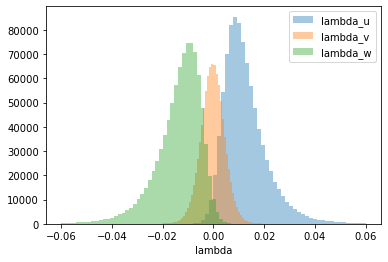

In [1082]:
sns.distplot(lambda_u[(lambda_u <0.06)],kde=False,label='lambda_u')
sns.distplot(lambda_v[(lambda_v <0.02) & (lambda_v > -0.02)],kde=False,label='lambda_v')
sns.distplot(lambda_w[(lambda_w >-0.06)],kde=False,label='lambda_w')
plt.legend()

In [1]:
idx = (lambda_u <0.03) & (lambda_w >-0.03)
sns.jointplot(y=lambda_u[idx],x=lambda_w[idx] ,kind='hex')

NameError: name 'lambda_u' is not defined

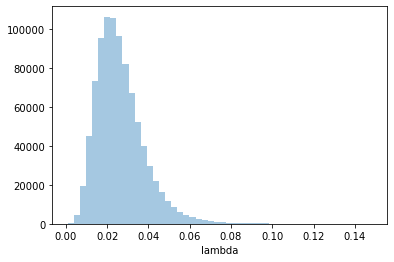

In [1080]:
#np.array(eigen_micro).shape
lambda_u = eigen_df.xs('u',level='eigen vector')['lambda']
lambda_v = eigen_df.xs('v',level='eigen vector')['lambda']
lambda_w = eigen_df.xs('w',level='eigen vector')['lambda']
sns.distplot(lambda_u[lambda_u <0.05] - lambda_w[lambda_w >-0.10],kde=False)

#sns.distplot(eigen_micro[:,-1],kde=False)
#sns.distplot(eigen_micro[:,0] - eigen_micro[:,-1],kde=False)

In [1048]:
eigen_df.loc[(slice(None),'u'),:]['x'].to_numpy()[0:10]

In [1050]:
np.zeros(ux.shape)[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

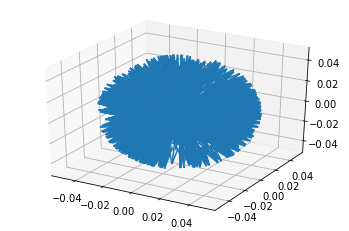

In [1055]:
#%matplotlib widget
N=1000
fig = plt.figure()
ax = fig.gca(projection='3d')
ux = eigen_df.loc[(slice(None),'u'),:]['x'].to_numpy()[0:N]
uy = eigen_df.loc[(slice(None),'u'),:]['y'].to_numpy()[0:N]
uz = eigen_df.loc[(slice(None),'u'),:]['z'].to_numpy()[0:N]
ax.quiver(np.zeros(ux.shape), np.zeros(ux.shape), np.zeros(ux.shape), ux, uy, uz, length=0.05, normalize=False)

In [878]:
tmp = eigen_micro[0:10]

In [893]:
np.array(tmp[0][0]).flatten() np.array(tmp[0][1]).flatten()

array([ 0.49320522, -0.86969626,  0.01941711, -0.3485487 , -0.17711291,
        0.9204047 ,  0.79703351,  0.46071622,  0.39048452])

In [894]:
eigen_micro[0]

(array([ 0.03731778, -0.0011352 , -0.01014182]),
 array([[ 0.49320522, -0.86969626,  0.01941711],
        [-0.3485487 , -0.17711291,  0.9204047 ],
        [ 0.79703351,  0.46071622,  0.39048452]]))

In [901]:
pd.DataFrame(eigen_micro[0][1],columns=['x','y','z']).join(pd.DataFrame(eigen_micro[0][0],columns=['lambda']))

,x,y,z,lambda
0,0.493205,-0.869696,0.019417,0.037318
1,-0.348549,-0.177113,0.920405,-0.001135
2,0.797034,0.460716,0.390485,-0.010142


In [906]:
np.concatenate((eigen_micro[0][0][0],eigen_micro[0][1][0]),axis=None)

array([ 0.03731778,  0.49320522, -0.86969626,  0.01941711])

In [907]:
tmp=eigen_micro[0]

In [908]:
tmp

(array([ 0.03731778, -0.0011352 , -0.01014182]),
 array([[ 0.49320522, -0.86969626,  0.01941711],
        [-0.3485487 , -0.17711291,  0.9204047 ],
        [ 0.79703351,  0.46071622,  0.39048452]]))

In [910]:
np.array([np.concatenate((tmp[0][n],tmp[1][n]),axis=None) for n in range(3)])

array([[ 0.03731778,  0.49320522, -0.86969626,  0.01941711],
       [-0.0011352 , -0.3485487 , -0.17711291,  0.9204047 ],
       [-0.01014182,  0.79703351,  0.46071622,  0.39048452]])

In [1023]:
a = np.array([1,2,3,4,5,6])
a.reshape(-1,3)

array([[1, 2, 3],
       [4, 5, 6]])